<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neural Networks: Regularization
</p>
</div>

DS-NTL-010824<p>Phase 4</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
from sklearn.datasets import load_sample_images
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array


import tensorflow as tf

#Set the global random seed
tf.random.set_seed(42)


### Things to remember:


## STEPS ##

1. Load Data
2. Define Keras Model
3. Compile Keras Model
4. Fit Keras Model
5. Evaluate Keras Model
6. Make Predictions


- The data and labels in `fit()` need to be numpy arrays, not `pandas` dfs.
- Scaling your data will have a large impact on your model.
   > For our traditional input features, we would use a scaler object. For images, as long as the minimum value is 0, we can simply divide through by the maximum pixel intensity.

#### Regularization
- Retain complexity of neural network: many weights to learn interesting relationships
- Make our weights less susceptible to overfitting

**Getting neural networks to perform really well**

In neural networks, two main forms of regularization:
- L2 Regularization (something familiar)
- Dropout Regularization (something a little new)

**L2 Regularization**

- Add penalty on weight **matrices**.
$$ J \rightarrow J' $$
$$ J = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) $$
$$ J' = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) + \frac{\lambda}{2} \sum_{l=1}^L \lVert  W^{[l]}   \rVert_F^2 $$

where $F$ denotes the Frobenius norm.

Frobenius norm is square root of sum of of element-wise square:
i.e. 
$$ \lVert  A   \rVert_F = \sqrt{\sum_{i,j} A_{ij}^2 }$$

In [2]:
import numpy as np
from numpy.linalg import norm

In [3]:
A = np.array([[1,2],[0,3]])
A

array([[1, 2],
       [0, 3]])

In [4]:
norm(A, 'fro')

3.7416573867739413

In [5]:
np.sqrt(1**2 + 0**2 + 2**2 + 3**2)

3.7416573867739413

Modiied objective functon:

$$ J' = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) + \frac{\lambda}{2} \sum_{l=1}^L \lVert  W^{[l]}   \rVert_F^2 $$

Regularization serves to penalize any particular weight from being too large:
- smoothens/redistributes weights for each weight matrix
- aids in generalization

L2 regularization: often known as weight decay
- Perspective: gradient descent
$$ J' = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) + \frac{\lambda}{2} \sum_{l=1}^L \lVert  W^{[l]}   \rVert_F^2 $$
$$ W^{[l]} \rightarrow W^{[l]} - \alpha \frac{\partial J'}{\partial W^{[l]}} $$ 

$$ J = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) $$
$$ W^{[l]} \rightarrow \Big(W^{[l]}  - \alpha \frac{\lambda}{2 m}  W^{[l]} \Big) - \alpha \frac{\partial J}{\partial W^{[l]}}$$ 

- At each iteration regularization tries to reduce magnitude of weight matrix.

#### Implementing L2 regularization in Keras

In [6]:
# creates keras regularizer object
from tensorflow.keras.regularizers import l2

L2 regularizer object takes in $\lambda$ parameter as argument

In [7]:
reg = l2(3e-3) # 1e-5 to .1

Implementing regularization to weights in Keras:
- Dense(kernel_regularizer = __)
- takes in string ('l2') or regularizer object

Less common but also used:

- can apply regularization to bias terms 
- Dense(bias_regularizer = __)

In [8]:
# load in the data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train/255 # normalization
x_test = x_test/255

# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)

In [ ]:
len(x_train)

In [9]:
model_images = Sequential()
model_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
model_images.add(Dense(32, activation='relu', kernel_regularizer = reg)) # take in regularizer
model_images.add(Dense(8, activation='relu', kernel_regularizer = reg))
model_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

In [10]:
model_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

In [11]:
# verbose=1 allows you to see the output.
# To see only the metrics at the end of each epoch, set verbose=2.
history_mnist = model_images.fit(x_train, y_tr_one_hot, epochs=50, batch_size= 32, validation_split = 0.2)
#The train set is .8, .8*60,000 = 48,000
# 48,000/32 = 1500.
# there are 1500 batches with 32 data points in them.

Epoch 1/50
1500/1500 [==============================] - 1s 534us/step - loss: 0.6878 - accuracy: 0.8502 - val_loss: 0.4751 - val_accuracy: 0.9107
Epoch 2/50
1500/1500 [==============================] - 1s 461us/step - loss: 0.4433 - accuracy: 0.9225 - val_loss: 0.4039 - val_accuracy: 0.9323
Epoch 3/50
1500/1500 [==============================] - 1s 453us/step - loss: 0.3967 - accuracy: 0.9321 - val_loss: 0.3663 - val_accuracy: 0.9409
Epoch 4/50
1500/1500 [==============================] - 1s 459us/step - loss: 0.3674 - accuracy: 0.9395 - val_loss: 0.3596 - val_accuracy: 0.9411
Epoch 5/50
1500/1500 [==============================] - 1s 460us/step - loss: 0.3481 - accuracy: 0.9426 - val_loss: 0.3263 - val_accuracy: 0.9504
Epoch 6/50
1500/1500 [==============================] - 1s 458us/step - loss: 0.3327 - accuracy: 0.9468 - val_loss: 0.3139 - val_accuracy: 0.9534
Epoch 7/50
1500/1500 [==============================] - 1s 458us/step - loss: 0.3185 - accuracy: 0.9484 - val_loss: 0.3047 -

In [12]:
# probability for each class
y_proba = model_images.predict(x_test)
y_proba

array([[2.5519048e-06, 8.5550482e-06, 8.4205072e-05, ..., 9.9881637e-01,
        1.1422329e-06, 1.4074254e-05],
       [2.8152199e-05, 3.6670147e-03, 9.9573296e-01, ..., 3.5685929e-07,
        1.0305309e-04, 7.5806202e-11],
       [9.0489193e-06, 9.9650830e-01, 6.1939575e-04, ..., 5.2467315e-04,
        1.1131720e-03, 2.4189565e-06],
       ...,
       [8.9536423e-09, 1.7728686e-06, 4.6430064e-09, ..., 1.4979723e-04,
        1.0331834e-04, 8.1455465e-03],
       [2.8776771e-05, 5.6815793e-06, 1.7217216e-07, ..., 3.8818470e-07,
        3.6900610e-04, 1.9274601e-06],
       [3.6562622e-05, 2.2934119e-08, 2.1203213e-04, ..., 3.8374137e-10,
        1.2852881e-08, 5.2221683e-08]], dtype=float32)

In [13]:
model_images.evaluate(x_test, y_tt_one_hot, verbose = 2)
#Loss, accuracy

313/313 - 0s - loss: 0.2118 - accuracy: 0.9614


[0.21179573237895966, 0.9613999724388123]

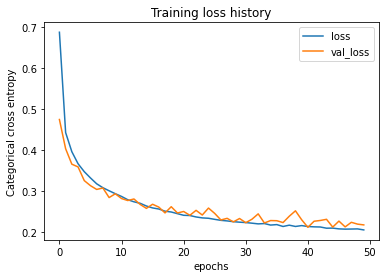

In [14]:
train_mnist_history = pd.DataFrame(history_mnist.history)
train_mnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_mnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

#Now we are not overfitting as much. This is better because of regularization.

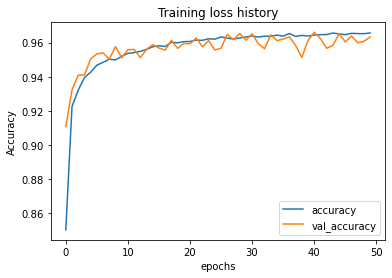

In [15]:
col_list = ['accuracy', 'val_accuracy']
train_mnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Better validation accuracy:
- 94.5\% to 96.3\% with regularization
- no overfitting

In [16]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

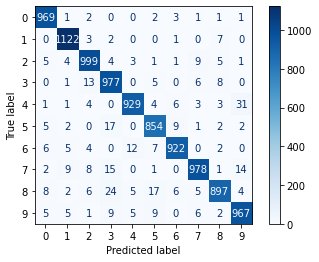

In [17]:
cm_digits = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Regularization: 
- key component to training deeper networks (tend to overfit without regularization)
- learn higher order features, but don't overtrain on specifics.

In [18]:
deepermodel_images = Sequential()
deepermodel_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
deepermodel_images.add(Dense(32, activation='relu', kernel_regularizer = reg)) # take in regularizer
deepermodel_images.add(Dense(16, activation='relu', kernel_regularizer = reg)) # add another layer
deepermodel_images.add(Dense(16, activation='relu', kernel_regularizer = reg)) # add another layer
deepermodel_images.add(Dense(10, activation='relu', kernel_regularizer = reg))
deepermodel_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

deepermodel_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

In [19]:
# will take a while... saving training history
history_deepermnist = deepermodel_images.fit(x_train, y_tr_one_hot, epochs=200, batch_size= 32, validation_split = 0.2)

Epoch 1/200
1500/1500 [==============================] - 1s 568us/step - loss: 0.8270 - accuracy: 0.8263 - val_loss: 0.5359 - val_accuracy: 0.9110
Epoch 2/200
1500/1500 [==============================] - 1s 492us/step - loss: 0.4904 - accuracy: 0.9232 - val_loss: 0.4334 - val_accuracy: 0.9383
Epoch 3/200
1500/1500 [==============================] - 1s 482us/step - loss: 0.4344 - accuracy: 0.9360 - val_loss: 0.4055 - val_accuracy: 0.9424
Epoch 4/200
1500/1500 [==============================] - 1s 486us/step - loss: 0.4018 - accuracy: 0.9410 - val_loss: 0.3914 - val_accuracy: 0.9442
Epoch 5/200
1500/1500 [==============================] - 1s 502us/step - loss: 0.3800 - accuracy: 0.9462 - val_loss: 0.3707 - val_accuracy: 0.9488
Epoch 6/200
1500/1500 [==============================] - 1s 484us/step - loss: 0.3643 - accuracy: 0.9487 - val_loss: 0.3519 - val_accuracy: 0.9504
Epoch 7/200
1500/1500 [==============================] - 1s 489us/step - loss: 0.3544 - accuracy: 0.9500 - val_loss: 0

1500/1500 [==============================] - 1s 481us/step - loss: 0.2435 - accuracy: 0.9636 - val_loss: 0.2620 - val_accuracy: 0.9580
Epoch 57/200
1500/1500 [==============================] - 1s 482us/step - loss: 0.2451 - accuracy: 0.9640 - val_loss: 0.2659 - val_accuracy: 0.9573
Epoch 58/200
1500/1500 [==============================] - 1s 493us/step - loss: 0.2439 - accuracy: 0.9637 - val_loss: 0.2702 - val_accuracy: 0.9564
Epoch 59/200
1500/1500 [==============================] - 1s 492us/step - loss: 0.2437 - accuracy: 0.9643 - val_loss: 0.2423 - val_accuracy: 0.9639
Epoch 60/200
1500/1500 [==============================] - 1s 495us/step - loss: 0.2423 - accuracy: 0.9638 - val_loss: 0.2570 - val_accuracy: 0.9614
Epoch 61/200
1500/1500 [==============================] - 1s 498us/step - loss: 0.2430 - accuracy: 0.9636 - val_loss: 0.2440 - val_accuracy: 0.9653
Epoch 62/200
1500/1500 [==============================] - 1s 490us/step - loss: 0.2413 - accuracy: 0.9649 - val_loss: 0.2532 

1500/1500 [==============================] - 1s 489us/step - loss: 0.2281 - accuracy: 0.9663 - val_loss: 0.2363 - val_accuracy: 0.9638
Epoch 112/200
1500/1500 [==============================] - 1s 480us/step - loss: 0.2289 - accuracy: 0.9651 - val_loss: 0.2415 - val_accuracy: 0.9621
Epoch 113/200
1500/1500 [==============================] - 1s 480us/step - loss: 0.2274 - accuracy: 0.9654 - val_loss: 0.2451 - val_accuracy: 0.9608
Epoch 114/200
1500/1500 [==============================] - 1s 488us/step - loss: 0.2293 - accuracy: 0.9647 - val_loss: 0.2524 - val_accuracy: 0.9577
Epoch 115/200
1500/1500 [==============================] - 1s 481us/step - loss: 0.2290 - accuracy: 0.9651 - val_loss: 0.2398 - val_accuracy: 0.9613
Epoch 116/200
1500/1500 [==============================] - 1s 483us/step - loss: 0.2278 - accuracy: 0.9655 - val_loss: 0.2356 - val_accuracy: 0.9638
Epoch 117/200
1500/1500 [==============================] - 1s 495us/step - loss: 0.2282 - accuracy: 0.9648 - val_loss: 0

1500/1500 [==============================] - 1s 484us/step - loss: 0.2187 - accuracy: 0.9668 - val_loss: 0.2263 - val_accuracy: 0.9645
Epoch 167/200
1500/1500 [==============================] - 1s 513us/step - loss: 0.2219 - accuracy: 0.9657 - val_loss: 0.2202 - val_accuracy: 0.9664
Epoch 168/200
1500/1500 [==============================] - 1s 486us/step - loss: 0.2202 - accuracy: 0.9668 - val_loss: 0.2276 - val_accuracy: 0.9651
Epoch 169/200
1500/1500 [==============================] - 1s 486us/step - loss: 0.2207 - accuracy: 0.9668 - val_loss: 0.2333 - val_accuracy: 0.9622
Epoch 170/200
1500/1500 [==============================] - 1s 485us/step - loss: 0.2208 - accuracy: 0.9661 - val_loss: 0.2290 - val_accuracy: 0.9635
Epoch 171/200
1500/1500 [==============================] - 1s 479us/step - loss: 0.2194 - accuracy: 0.9663 - val_loss: 0.2338 - val_accuracy: 0.9629
Epoch 172/200
1500/1500 [==============================] - 1s 483us/step - loss: 0.2217 - accuracy: 0.9655 - val_loss: 0

In [20]:
#evaluate test accuracy
deepermodel_images.evaluate(x_test, y_tt_one_hot, verbose = 2)

313/313 - 0s - loss: 0.2515 - accuracy: 0.9564


[0.2515091896057129, 0.9563999772071838]

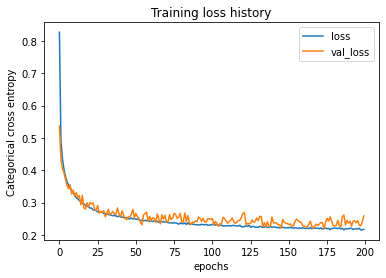

In [21]:
train_deepmnist_history = pd.DataFrame(history_deepermnist.history)
train_deepmnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_deepmnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()
#Here we made the model more complex.

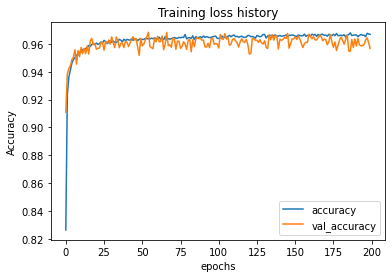

In [22]:
col_list = ['accuracy', 'val_accuracy']
train_deepmnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Not overfitting even while adding much more complexity:
- in this case, not gaining much either

To do better:
- try a different regularization technique
- may need to think harder about network architecture

#### Dropout Regularization
- Architecture based strategy.

On each forward/backprop iteration:
- given layer with dropout
- shut off activations to randomly selected nodes in layer

![drop_out](images/drop_out.png)

<img src = "Images/dropout_network.gif" >

In [ ]:
#For hidden layer 4, there is a 25% probability for each node that it will turn off?

- Set $p^{[l]}$  uniform probability of node dropout for given layer
- each train cycle: kills different activations

Dead nodes dont contribute to weight updates in backprop.

after many train cycles: have learned weights:
- contributions from many different networks learning different things

<img src = "Images/Deeper_network.jpg">

Validation/test phase:
- use all nodes and learned weights.
- make prediction.

**Why it works as regularization**
- network learns not to trust in any one subset of weights: unlikely any particular weight subset gets too big.
- distributes weights in way that is robust to network noise (random dropout): generalizes well. 

#### Dropout in Keras

- Simply add it as though it were a layer. It will apply to the immediately preceding layer.

In [23]:
from tensorflow.keras.layers import Dropout

Dropout() takes in the dropout probability as a constructor argument:
- Dropout($p$) after some of the hidden layers.
- $p \in [0.2, 0.5]$ as good range to try.

In [24]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

**Define model**

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2)) # dropout on previous activations
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.1)) # dropout
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation ='softmax'))

# compile model
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Some tips:
- Dropout earlier in network or inputs. Don't put on final layers.
- Try faster learning rates in optimizer

In [26]:
# will take a while
history_dropoutmnist = model.fit(x_train, y_tr_one_hot, epochs=200, batch_size= 32, validation_split = 0.2, verbose =2)

Epoch 1/200
1500/1500 - 1s - loss: 0.8695 - accuracy: 0.7085 - val_loss: 0.3830 - val_accuracy: 0.9003
Epoch 2/200
1500/1500 - 1s - loss: 0.5602 - accuracy: 0.8297 - val_loss: 0.3176 - val_accuracy: 0.9169
Epoch 3/200
1500/1500 - 1s - loss: 0.4931 - accuracy: 0.8516 - val_loss: 0.2936 - val_accuracy: 0.9247
Epoch 4/200
1500/1500 - 1s - loss: 0.4606 - accuracy: 0.8627 - val_loss: 0.2753 - val_accuracy: 0.9243
Epoch 5/200
1500/1500 - 1s - loss: 0.4417 - accuracy: 0.8685 - val_loss: 0.2586 - val_accuracy: 0.9342
Epoch 6/200
1500/1500 - 1s - loss: 0.4196 - accuracy: 0.8740 - val_loss: 0.2679 - val_accuracy: 0.9299
Epoch 7/200
1500/1500 - 1s - loss: 0.4066 - accuracy: 0.8811 - val_loss: 0.2490 - val_accuracy: 0.9377
Epoch 8/200
1500/1500 - 1s - loss: 0.4026 - accuracy: 0.8808 - val_loss: 0.2440 - val_accuracy: 0.9375
Epoch 9/200
1500/1500 - 1s - loss: 0.3917 - accuracy: 0.8849 - val_loss: 0.2372 - val_accuracy: 0.9397
Epoch 10/200
1500/1500 - 1s - loss: 0.3786 - accuracy: 0.8899 - val_loss:

Epoch 80/200
1500/1500 - 1s - loss: 0.2812 - accuracy: 0.9217 - val_loss: 0.2237 - val_accuracy: 0.9449
Epoch 81/200
1500/1500 - 1s - loss: 0.2817 - accuracy: 0.9212 - val_loss: 0.2098 - val_accuracy: 0.9473
Epoch 82/200
1500/1500 - 1s - loss: 0.2810 - accuracy: 0.9211 - val_loss: 0.2139 - val_accuracy: 0.9466
Epoch 83/200
1500/1500 - 1s - loss: 0.2791 - accuracy: 0.9218 - val_loss: 0.2127 - val_accuracy: 0.9454
Epoch 84/200
1500/1500 - 1s - loss: 0.2792 - accuracy: 0.9221 - val_loss: 0.2228 - val_accuracy: 0.9438
Epoch 85/200
1500/1500 - 1s - loss: 0.2754 - accuracy: 0.9236 - val_loss: 0.2240 - val_accuracy: 0.9423
Epoch 86/200
1500/1500 - 1s - loss: 0.2767 - accuracy: 0.9235 - val_loss: 0.2203 - val_accuracy: 0.9431
Epoch 87/200
1500/1500 - 1s - loss: 0.2809 - accuracy: 0.9206 - val_loss: 0.2120 - val_accuracy: 0.9469
Epoch 88/200
1500/1500 - 1s - loss: 0.2812 - accuracy: 0.9213 - val_loss: 0.2187 - val_accuracy: 0.9461
Epoch 89/200
1500/1500 - 1s - loss: 0.2776 - accuracy: 0.9222 - 

Epoch 159/200
1500/1500 - 1s - loss: 0.2655 - accuracy: 0.9264 - val_loss: 0.2388 - val_accuracy: 0.9438
Epoch 160/200
1500/1500 - 1s - loss: 0.2655 - accuracy: 0.9265 - val_loss: 0.2262 - val_accuracy: 0.9457
Epoch 161/200
1500/1500 - 1s - loss: 0.2601 - accuracy: 0.9288 - val_loss: 0.2260 - val_accuracy: 0.9450
Epoch 162/200
1500/1500 - 1s - loss: 0.2645 - accuracy: 0.9261 - val_loss: 0.2191 - val_accuracy: 0.9442
Epoch 163/200
1500/1500 - 1s - loss: 0.2640 - accuracy: 0.9272 - val_loss: 0.2288 - val_accuracy: 0.9440
Epoch 164/200
1500/1500 - 1s - loss: 0.2625 - accuracy: 0.9269 - val_loss: 0.2150 - val_accuracy: 0.9449
Epoch 165/200
1500/1500 - 1s - loss: 0.2589 - accuracy: 0.9277 - val_loss: 0.2173 - val_accuracy: 0.9462
Epoch 166/200
1500/1500 - 1s - loss: 0.2666 - accuracy: 0.9272 - val_loss: 0.2350 - val_accuracy: 0.9408
Epoch 167/200
1500/1500 - 1s - loss: 0.2667 - accuracy: 0.9258 - val_loss: 0.2243 - val_accuracy: 0.9458
Epoch 168/200
1500/1500 - 1s - loss: 0.2594 - accuracy:

Accuracy on train set will be lower in any given cycle:
- some activation killed randomly on training.

Performance on validation will be high:
- uses full network with learned weights for validation

Not overtraining despite high model capacity:
- many hidden layers

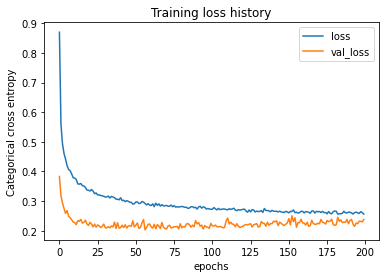

In [27]:
train_dropoutmnist_history = pd.DataFrame(history_dropoutmnist.history)
train_dropoutmnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_dropoutmnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()
#The blue line is not using all of the network.
#The orange line is using all of the nodes.

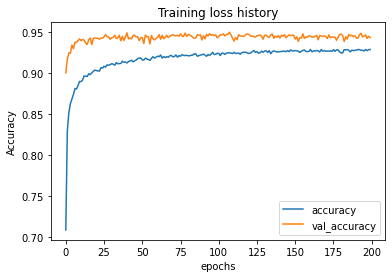

In [28]:
col_list = ['accuracy', 'val_accuracy']
train_dropoutmnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()
#Now we are underfitting.

Evaluate on test set.

In [29]:
model.evaluate(x_test, y_tt_one_hot, verbose =0)

[0.233934685587883, 0.9453999996185303]

#### Dropout regularization in conjunction with L2:

- can be used to train very deep networks
- model complex relationships without overfitting
- works best in these cases with a lot of data

Next up:
- doing much better with a more suitable network architecture
- Convolutional Neural Networks (CNNs)

## HyperParameter Tuning

```python
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create the Keras model
def create_model(optimizer='adam', units=32, activation='relu'):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_dim=input_dim))
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier based on the create_model function
model = KerasClassifier(build_fn=create_model)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'sgd'],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their performance
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)
```


In [ ]:
#How to save a model.


# import pickle

# # Assume 'model' is your trained model
# model = ...  # Your trained model here

# # Save the model to disk
# with open('model.pkl', 'wb') as file:
#     pickle.dump(model, file)
# import pickle

# # Load the model from disk
# with open('model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

# # Use the loaded model to make predictions
# # predictions = loaded_model.predict(X_new)